Top 5 cities: ['Paris', 'London', 'Milan', 'Amsterdam', 'Barcelona']


/root/.ipykernel/23944/command-4968921652930149-2866295632:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df["wthr_date"], rotation=45)


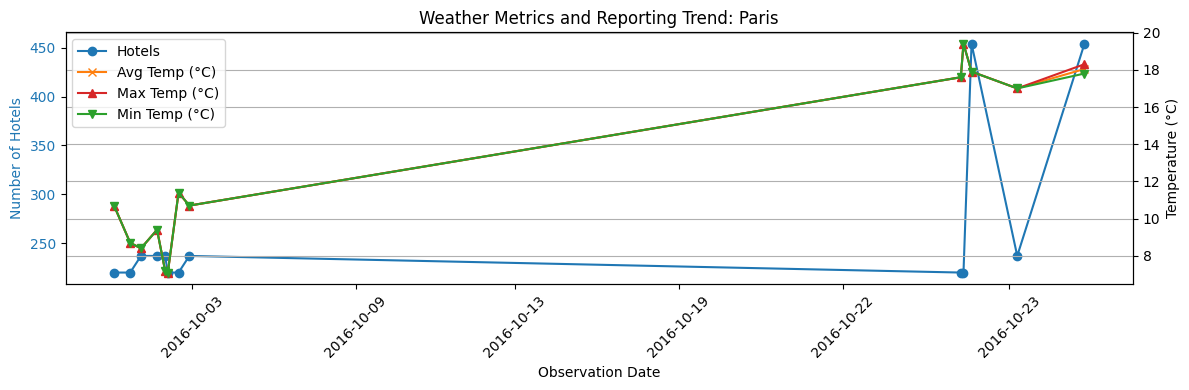

/root/.ipykernel/23944/command-4968921652930149-2866295632:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df["wthr_date"], rotation=45)


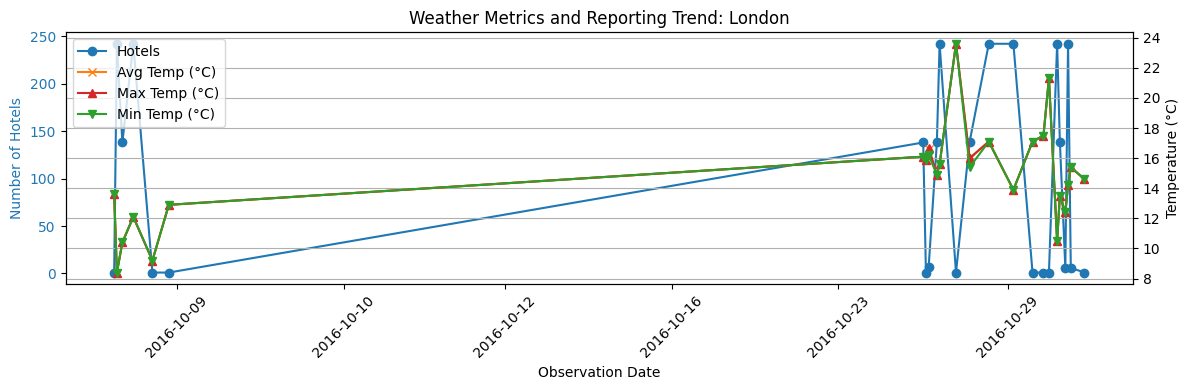

/root/.ipykernel/23944/command-4968921652930149-2866295632:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df["wthr_date"], rotation=45)


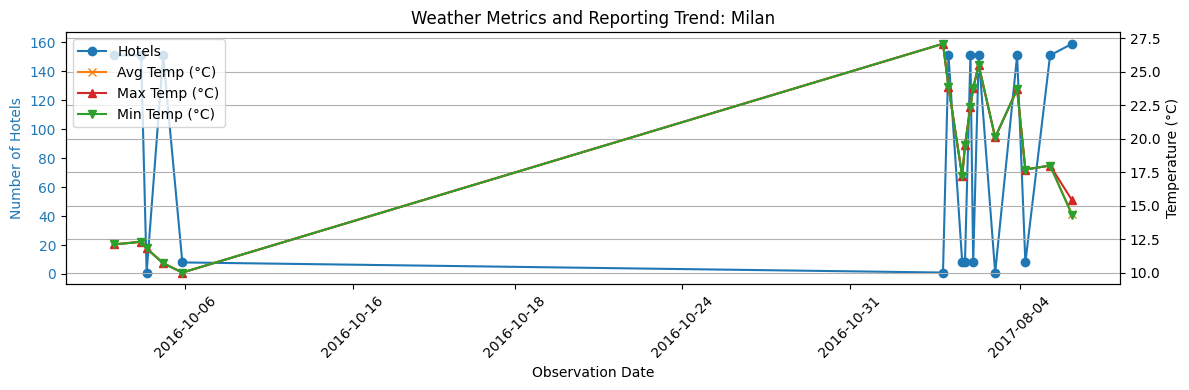

/root/.ipykernel/23944/command-4968921652930149-2866295632:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df["wthr_date"], rotation=45)


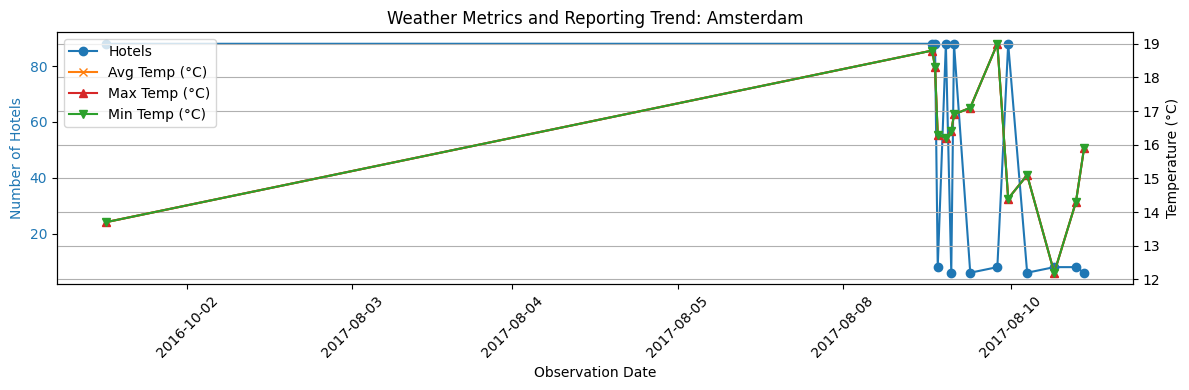

/root/.ipykernel/23944/command-4968921652930149-2866295632:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df["wthr_date"], rotation=45)


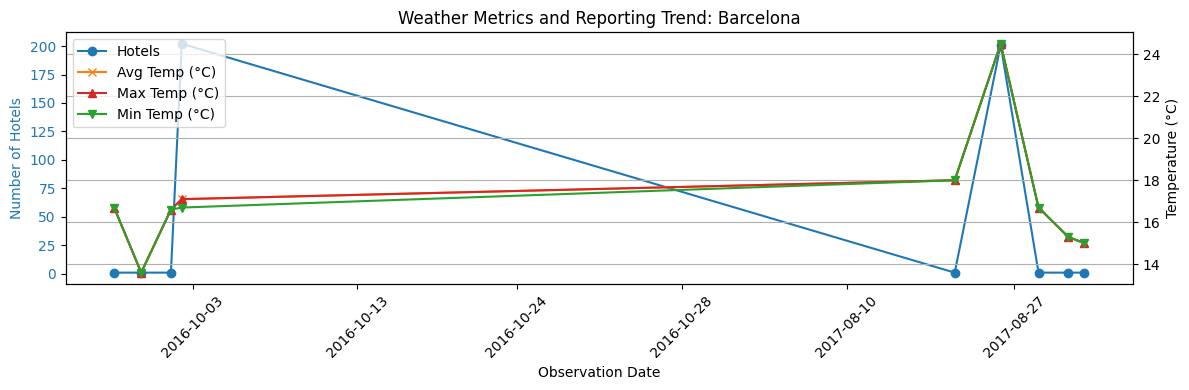

In [0]:
import matplotlib.pyplot as plt

# Top 5 cities by number of reported hotels
top_cities = [row["city"] for row in spark.sql("""
    SELECT city, SUM(num_distinct_hotels) AS total_hotels
    FROM gold.hotel_weather_metrics
    GROUP BY city
    ORDER BY total_hotels DESC
    LIMIT 5
""").collect()]

print("Top 5 cities:", top_cities)

# Prepare dataset + plot per city
for city in top_cities:
    df = spark.sql(f"""
        SELECT wthr_date, num_distinct_hotels, avg_temp_c, max_temp_c, min_temp_c
        FROM gold.hotel_weather_metrics
        WHERE city = '{city}'
        ORDER BY wthr_date
    """).toPandas()
    
    fig, ax1 = plt.subplots(figsize=(12,4))
    
    # Left Y-axis: Number of Hotels
    ax1.plot(df["wthr_date"], df["num_distinct_hotels"], color='tab:blue', marker='o', label='Hotels')
    ax1.set_xlabel("Observation Date")
    ax1.set_ylabel("Number of Hotels", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_xticklabels(df["wthr_date"], rotation=45)
    
    # Right Y-axis: Temperatures
    ax2 = ax1.twinx()
    ax2.plot(df["wthr_date"], df["avg_temp_c"], color='tab:orange', marker='x', label='Avg Temp (°C)')
    ax2.plot(df["wthr_date"], df["max_temp_c"], color='tab:red', marker='^', label='Max Temp (°C)')
    ax2.plot(df["wthr_date"], df["min_temp_c"], color='tab:green', marker='v', label='Min Temp (°C)')
    ax2.set_ylabel("Temperature (°C)", color='black')
    
    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    
    plt.title(f"Weather Metrics and Reporting Trend: {city}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
